In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn import preprocessing

import statsmodels.formula.api as smf
import statsmodels.api as sm

In [16]:
car_dataset=pd.read_csv("/content/car data.csv")
print(car_dataset.shape)
car_dataset

(301, 9)


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


Higher selling price: 35.0
Lower selling price: 0.1
Average selling price: 4.661295681063123


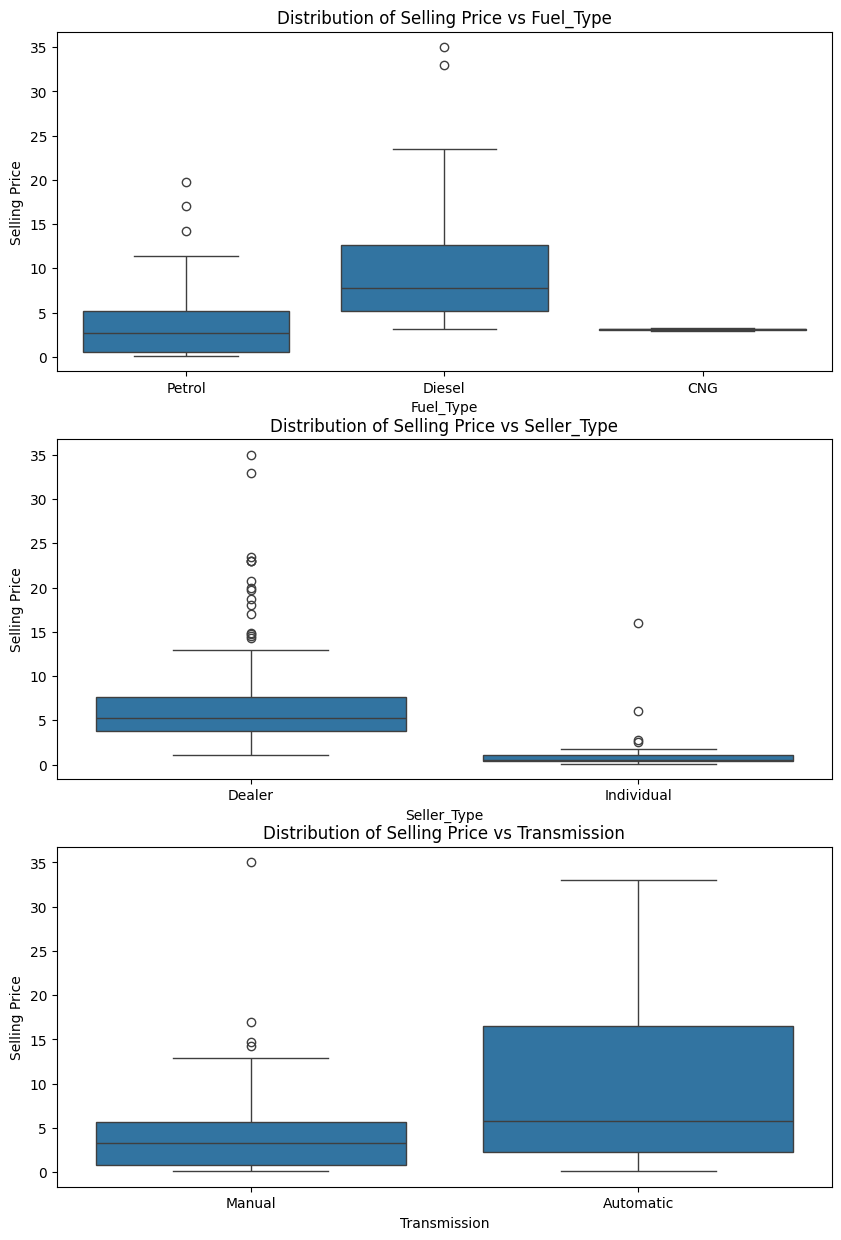

In [17]:
features = ['Fuel_Type', 'Seller_Type', 'Transmission']


# Set up the subplot structure
fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(10, 5 * len(features)))

# Create a histogram for each feature
for i, feature in enumerate(features):
    if feature in car_dataset.columns:  # Ensure the feature exists in the dataset
        sns.boxplot(data=car_dataset, x=feature, y="Selling_Price", ax=axes[i])
        axes[i].set_title(f'Distribution of Selling Price vs {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Selling Price')

# Show the overall max, min, and average selling price
print("Higher selling price:", car_dataset['Selling_Price'].max())
print("Lower selling price:", car_dataset['Selling_Price'].min())
print("Average selling price:", car_dataset['Selling_Price'].mean())


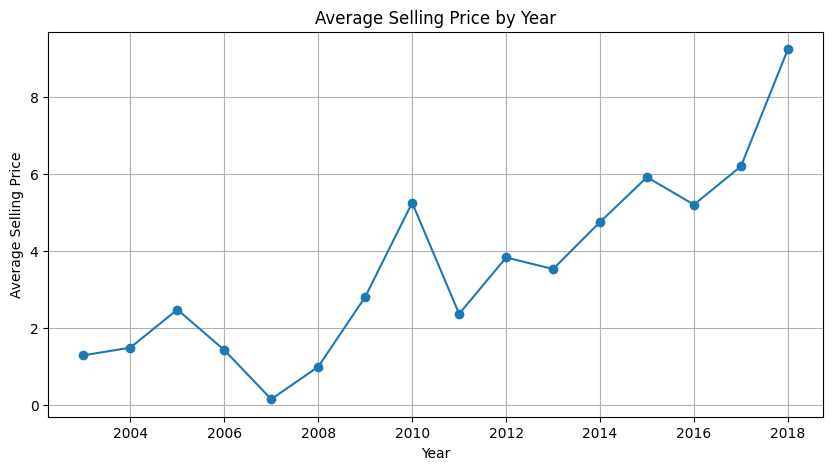

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming car_dataset is your DataFrame and it contains 'Year' and 'Selling_Price'
average_price_per_year = car_dataset.groupby('Year')['Selling_Price'].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(average_price_per_year['Year'], average_price_per_year['Selling_Price'], marker='o')
plt.title('Average Selling Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Selling Price')
plt.grid()
plt.show()


In [19]:
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


highter selling price 35.0
lower selling price 0.1
average selling price 4.661295681063123


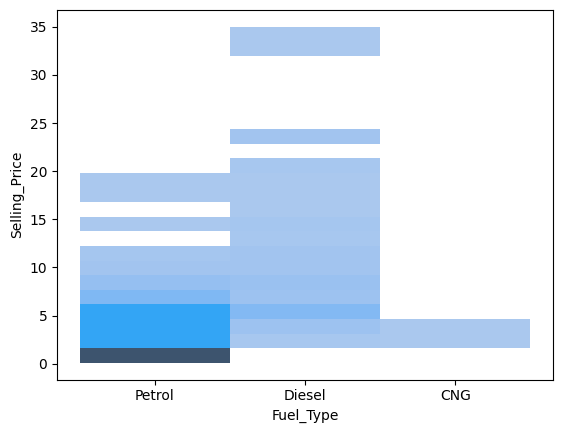

In [20]:
sns.histplot(y="Selling_Price",x="Fuel_Type",data=car_dataset)
print("highter selling price",car_dataset.Selling_Price.max())
print("lower selling price",car_dataset.Selling_Price.min())
print("average selling price",car_dataset.Selling_Price.mean())

In [22]:
le=preprocessing.LabelEncoder()
car_dataset["Fuel_Type"]=le.fit_transform(car_dataset["Fuel_Type"])
car_dataset["Seller_Type"]=le.fit_transform(car_dataset["Seller_Type"])
car_dataset["Transmission"]=le.fit_transform(car_dataset["Transmission"])
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    int64  
 6   Seller_Type    301 non-null    int64  
 7   Transmission   301 non-null    int64  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 21.3+ KB


In [ ]:
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
2    239
1     60
0      2
Name: count, dtype: int64
Seller_Type
0    195
1    106
Name: count, dtype: int64
Transmission
1    261
0     40
Name: count, dtype: int64


In [ ]:
car_dataset.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [ ]:
car_dataset.drop("Car_Name",axis=1,inplace=True)
print(car_dataset.columns)

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')


In [ ]:
car_dataset.rename(columns={"incorrect_name": "Fuel_Type"}, inplace=True)
car_dataset


,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,2,0,1,0
1,2013,4.75,9.54,43000,1,0,1,0
2,2017,7.25,9.85,6900,2,0,1,0
3,2011,2.85,4.15,5200,2,0,1,0
4,2014,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,1,0,1,0
297,2015,4.00,5.90,60000,2,0,1,0
298,2009,3.35,11.00,87934,2,0,1,0
299,2017,11.50,12.50,9000,1,0,1,0


##Forward Selection and OLS(ordinary least squares) for predection
To choose the main depedants variables that participate on theright predection of Selling_Price


In [ ]:
vars = set(car_dataset.columns)
vars.remove("Selling_Price")
model_vars = []
p_valuenull = 0.05
best_value = 0.0

while len(vars) > 0 and best_value < p_valuenull:
    test_models = []
    for var in vars:
        reg_model = "{} ~ {}".format("Selling_Price", " + ".join(model_vars + [var]))
        fit_model = smf.ols(reg_model, data=car_dataset).fit()
        pvalue_test_model = fit_model.pvalues[var]
        test_models.append((pvalue_test_model, var))
        test_models.sort()

    best_value, selected_var = test_models.pop(0)
    if best_value < p_valuenull:
        model_vars.append(selected_var)
        vars.remove(selected_var)

print("Selected features:", model_vars)


Selected features: ['Present_Price', 'Year', 'Fuel_Type', 'Seller_Type', 'Transmission']


we can clearly notice that the Selling_Price depends on Present_Price + Year + Fuel_Type + Seller_Type + Transmission + Owne
r

In [ ]:
final_reg_model = "{} ~ {}".format("Selling_Price", " + ".join(model_vars))
final_fit_model = smf.ols(final_reg_model, data=car_dataset).fit()

OLS_prediction_train = final_fit_model.predict(x_train[model_vars])
OLS_prediction_train_df = pd.DataFrame(OLS_prediction_train, columns=["Predicted_Price"])
datafinal_train = OLS_prediction_train_df.join(y_train.reset_index(drop=True))

OLS_prediction_test = final_fit_model.predict(x_test[model_vars])
OLS_prediction_test_df = pd.DataFrame(OLS_prediction_test, columns=["Predicted_Price"])
datafinal_test = OLS_prediction_test_df.join(y_test.reset_index(drop=True))

# Printing separate DataFrames for training and testing predictions
print("Training Data Predictions:")
datafinal_train



Training Data Predictions:


,Predicted_Price,Selling_Price
74,6.750375,9.25
239,2.419872,0.40
64,21.543390,7.25
294,4.389057,NaN
286,5.795469,NaN
...,...,...
251,5.303264,NaN
192,-2.645068,7.75
117,1.540419,0.75
47,-0.461121,5.95


In [ ]:
print("Testing Data Predictions:")
datafinal_test

Testing Data Predictions:


,Predicted_Price,Selling_Price
223,7.418132,NaN
150,-0.773445,NaN
226,4.361103,NaN
296,8.852498,NaN
52,14.249517,4.80
...,...,...
137,0.128246,NaN
227,1.960386,NaN
26,3.517462,0.38
106,1.767780,NaN


In [ ]:
# R squared Error
error_score_OLS = metrics.r2_score(y_train,OLS_prediction_train)
print("R squared Error : ",error_score_OLS)

R squared Error :  0.8644616006602799


LINEAR REGRESSION MODEL

In [ ]:
x=car_dataset[["Present_Price","Year","Fuel_Type","Seller_Type","Transmission","Owner"]]
y=car_dataset["Selling_Price"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(240, 6) (240,) (61, 6) (61,)


In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)

In [ ]:
linear_reg_predict=model.predict(x_train)
linear_reg_predict=pd.DataFrame(linear_reg_predict,columns=["Predicted_Price"],)
datafinal=linear_reg_predict.join(y_train)
datafinal



,Predicted_Price,Selling_Price
0,6.647577,3.35
1,2.447076,4.75
2,21.158176,7.25
3,4.345554,2.85
4,5.690695,4.60
...,...,...
235,5.263278,9.10
236,-3.424401,3.10
237,1.541333,11.25
238,-0.272542,NaN


In [ ]:
# R squared Error
error_score_linearRegression= metrics.r2_score(y_train,linear_reg_predict)
print("R squared Error : ", error_score_linearRegression)

R squared Error :  0.8670536275995944


USING LASSO REGRESSION


In [ ]:
lasso_reg=Lasso().fit(x_train,y_train)
lasso_predict=lasso_reg.predict(x_train)
lasso_predict=pd.DataFrame(lasso_predict,columns=["Predicted_Price"])
datafinal=lasso_predict.join(y_train)
datafinal

,Predicted_Price,Selling_Price
0,5.318509,3.35
1,2.403070,4.75
2,19.790926,7.25
3,4.271724,2.85
4,5.516239,4.60
...,...,...
235,5.443252,9.10
236,-1.165264,3.10
237,2.215589,11.25
238,0.153699,NaN


In [ ]:
errorr_score_lasso=metrics.r2_score(y_train,lasso_predict)
print("R squared Error : ", errorr_score_lasso)


R squared Error :  0.8331839945355867


In [ ]:
print("Error Score :")
print("- OLS: {:.4f}".format(error_score_OLS))
print("- Linear Regression: {:.4f}".format(error_score_linearRegression))
print("- Lasso Regression: {:.4f}".format(errorr_score_lasso))


Error Score :
- OLS: 0.8645
- Linear Regression: 0.8671
- Lasso Regression: 0.8332


**Lasso Regression has the lowest error score (0.8332), indicating it performs the best among the three models.

**OLS (0.8645) performs better than Linear Regression (0.8671), but not as well as Lasso.

In [2]:
pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 436.6/436.6 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.

In [45]:
def predict_price(Present_Price, Year, Kms_Driven, Fuel_Type, Seller_Type, Transmission, Owner):
    try:
        if Fuel_Type is None or Seller_Type is None or Transmission is None:
            return "Please provide valid values for all fields."

        input_data = pd.DataFrame({
            "Present_Price": [Present_Price],
            "Year": [Year],
            "Kms_Driven": [Kms_Driven],
            "Fuel_Type": [le_fuel.transform([Fuel_Type])[0]],
            "Seller_Type": [le_seller.transform([Seller_Type])[0]],
            "Transmission": [le_transmission.transform([Transmission])[0]],
            "Owner": [Owner]
        })

        input_data = input_data[X.columns]

        # Predict selling price
        prediction = lasso_reg.predict(input_data)
        return round(prediction[0], 2)

    except Exception as e:
        return f"Erreur lors de la prédiction : {str(e)}"
test_price = predict_price(5.0, 2015, 30000, "Petrol", "Dealer", "Manual", 0)
print(test_price)

3.79


In [43]:
app = gr.Interface(
    fn=predict_price,
    inputs=[
        gr.Number(label="Present Price"),
        gr.Number(label="Year"),
        gr.Number(label="Kilometers Driven"),
        gr.Dropdown(["Petrol", "Diesel", "CNG"], label="Fuel Type", value="Petrol"),
        gr.Dropdown(["Dealer", "Individual"], label="Seller Type", value="Dealer"),
        gr.Dropdown(["Manual", "Automatic"], label="Transmission", value="Manual"),
        gr.Number(label="Owner", value=0)
    ],
    outputs="text",
    title="Car Price Prediction",
    description="Predict the selling price of a car based on its features."
)

app.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4f26f1b68b31ca63db.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
